In [1]:
# Étape 1 : Importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Étape 2 : Chargement des données
df = pd.read_csv("health_activity_data.csv", sep=";")

In [3]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No,No
1,2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No,No
2,3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
3,4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No,No
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No


In [4]:
# Dimensions du dataset
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

Nombre de lignes : 49
Nombre de colonnes : 16


In [5]:
# Infos générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            49 non-null     int64  
 1   Age                           49 non-null     int64  
 2   Gender                        49 non-null     object 
 3   Height_cm                     49 non-null     int64  
 4   Weight_kg                     49 non-null     int64  
 5   BMI                           49 non-null     float64
 6   Daily_Steps                   49 non-null     int64  
 7   Calories_Intake               49 non-null     int64  
 8   Hours_of_Sleep                49 non-null     float64
 9   Heart_Rate                    49 non-null     int64  
 10  Blood_Pressure                49 non-null     object 
 11  Exercise_Hours_per_Week       49 non-null     float64
 12  Smoker                        49 non-null     object 
 13  Alcohol

In [6]:
# Statistiques descriptives
df.describe(include="all")

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
count,49.00000,49.000000,49,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49,49.000000,49,49.000000,49,49
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN,2,NaN,2,2
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137/72,NaN,No,NaN,No,No
freq,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,33,NaN,40,43
mean,25.00000,51.469388,NaN,177.734694,83.551020,26.632041,11360.061224,2588.571429,7.038776,84.877551,NaN,5.110204,NaN,4.326531,NaN,NaN
std,14.28869,18.581019,NaN,13.564315,19.946868,4.780709,5322.753362,622.057842,1.798589,19.682514,NaN,3.015394,NaN,2.593162,NaN,NaN
min,1.00000,19.000000,NaN,151.000000,51.000000,19.330000,1687.000000,1310.000000,4.100000,55.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,13.00000,38.000000,NaN,167.000000,69.000000,23.140000,6462.000000,2216.000000,5.600000,66.000000,NaN,2.700000,NaN,3.000000,NaN,NaN
50%,25.00000,50.000000,NaN,180.000000,82.000000,26.550000,12349.000000,2664.000000,6.900000,87.000000,NaN,5.000000,NaN,4.000000,NaN,NaN
75%,37.00000,69.000000,NaN,189.000000,101.000000,30.930000,15527.000000,3069.000000,8.700000,101.000000,NaN,7.700000,NaN,7.000000,NaN,NaN


In [7]:
# Vérification des valeurs manquantes
df.isnull().sum()

ID                              0
Age                             0
Gender                          0
Height_cm                       0
Weight_kg                       0
BMI                             0
Daily_Steps                     0
Calories_Intake                 0
Hours_of_Sleep                  0
Heart_Rate                      0
Blood_Pressure                  0
Exercise_Hours_per_Week         0
Smoker                          0
Alcohol_Consumption_per_Week    0
Diabetic                        0
Heart_Disease                   0
dtype: int64

In [8]:
# Étape 3 : Nettoyage / encodage des colonnes catégorielles
df_encoded = df.copy()

In [9]:
# On encode toutes les colonnes non numériques
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

In [10]:
# Vérifie que toutes les colonnes sont bien numériques
print(df_encoded.dtypes)

ID                                int64
Age                               int64
Gender                            int32
Height_cm                         int64
Weight_kg                         int64
BMI                             float64
Daily_Steps                       int64
Calories_Intake                   int64
Hours_of_Sleep                  float64
Heart_Rate                        int64
Blood_Pressure                    int32
Exercise_Hours_per_Week         float64
Smoker                            int32
Alcohol_Consumption_per_Week      int64
Diabetic                          int32
Heart_Disease                     int32
dtype: object


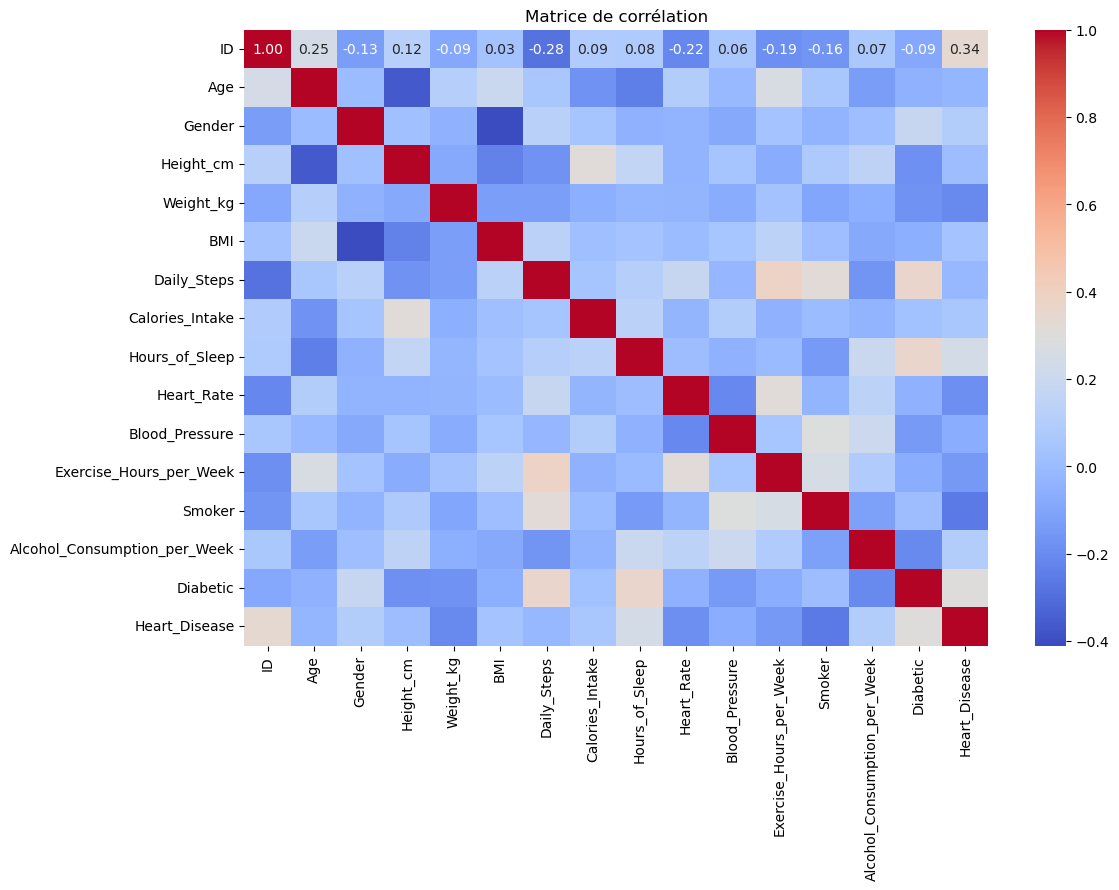

In [11]:
# Étape 4 : Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

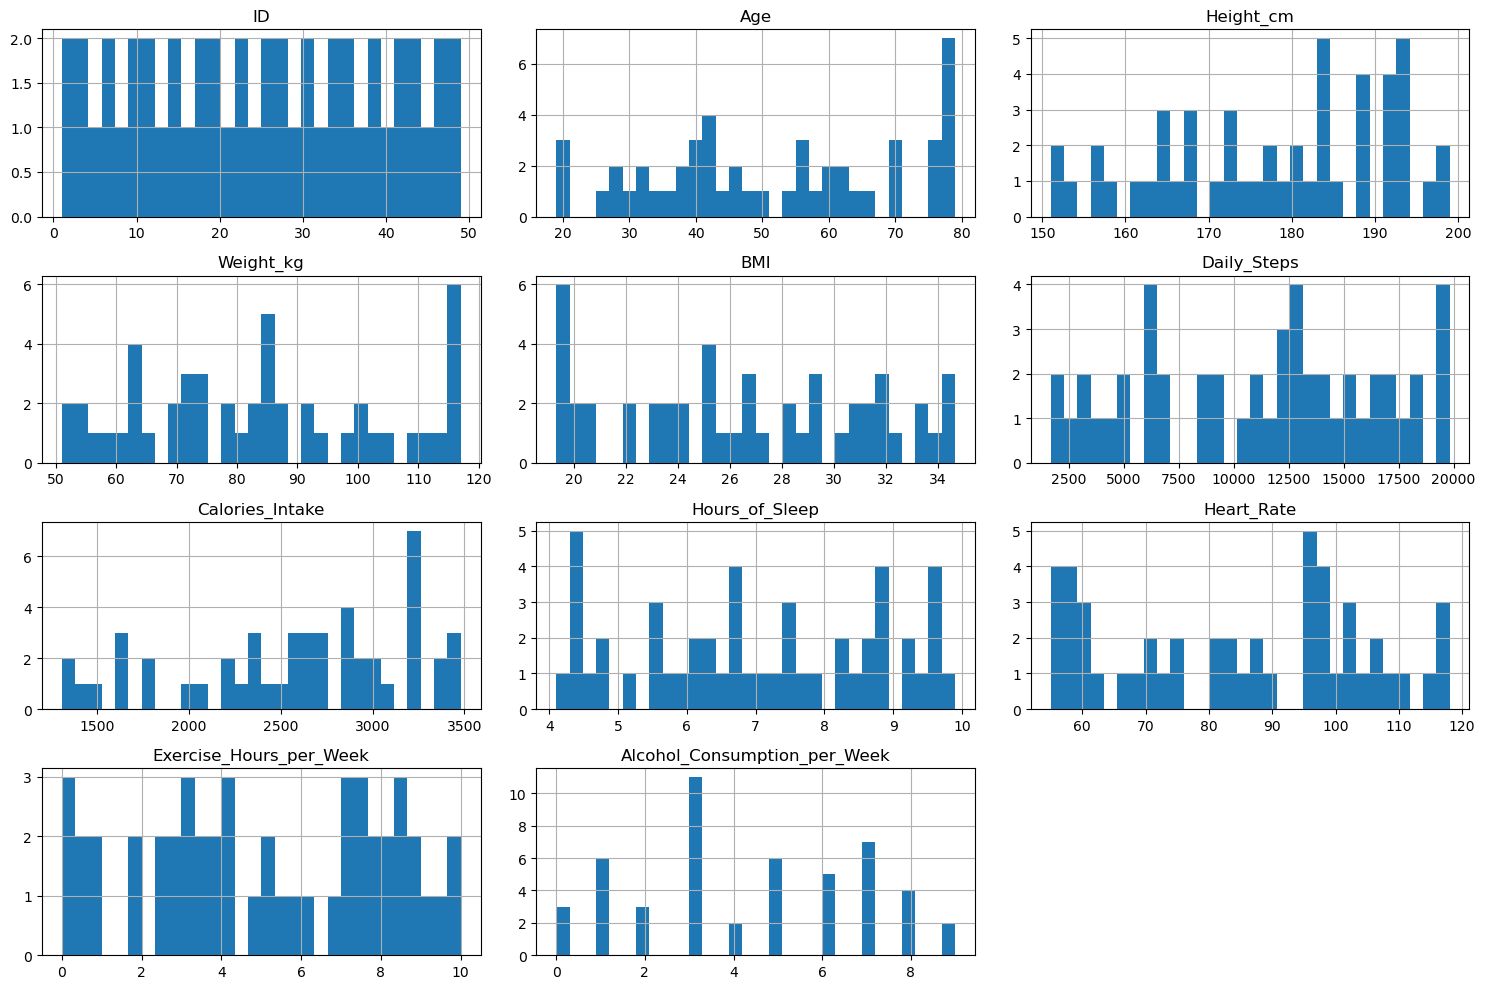

In [12]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

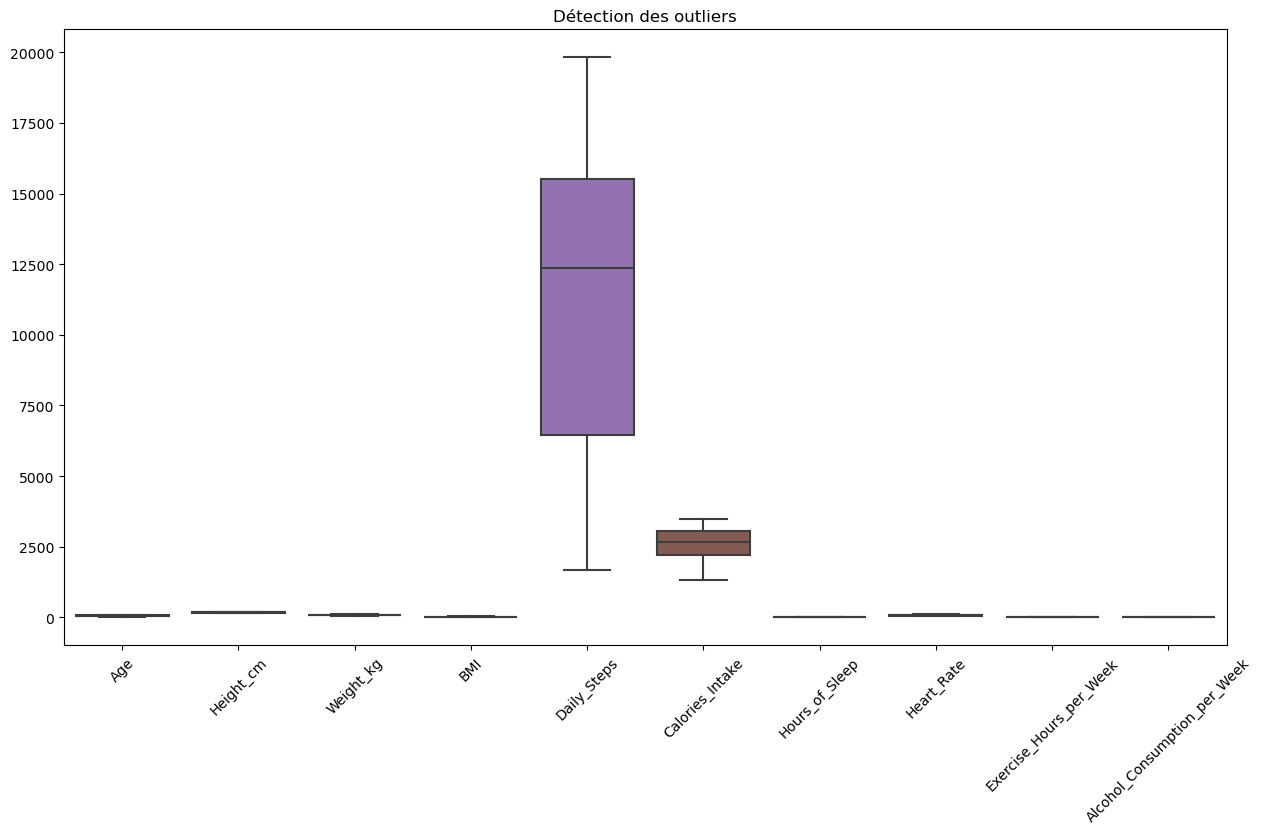

In [13]:
# Boîtes à moustaches pour détecter les outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(['ID', 'Diabetic', 'Heart_Disease'], axis=1))
plt.xticks(rotation=45)
plt.title("Détection des outliers")
plt.show()

In [14]:
# Étape 5 : Séparation des features et de la target
X = df_encoded.drop("Diabetic", axis=1)
y = df_encoded["Diabetic"]

In [15]:
# Étape 6 : Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Étape 7 : Découpage en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [17]:
# Étape 8 : Modélisation avec Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Étape 9 : Prédictions
y_pred = model.predict(X_test)

In [19]:
# Étape 10 : Évaluation du modèle
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.00      0.00      0.00         2

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10

Confusion Matrix:
 [[8 0]
 [2 0]]


C:\Users\SARRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nous avons réalisé une classification afin de prédire la présence ou non de maladies chroniques chez les individus,
en nous basant sur leurs habitudes de vie, dans le but d'identifier les profils à risque et d'anticiper les besoins en prévention et en soins.

🔍 Analyse des résultats :
✅ Accuracy Score : 0.8 (80%)
Cela signifie que 80% des prédictions du modèle sont correctes.

Attention : cette métrique peut être trompeuse s’il y a un déséquilibre dans les classes.

📊 Classification Report :
Classe 0 (Pas de maladie chronique)
Precision : 0.80, Recall : 1.00, F1-score : 0.89
👉 Le modèle est très bon pour détecter les personnes sans maladie. Il ne fait aucune erreur sur cette classe.

Classe 1 (Avec maladie chronique)
Precision, Recall, F1-score : 0.00
👉 Le modèle échoue totalement à détecter les personnes malades : il ne prédit jamais la classe 1.

Conclusion générale :
Bien que le modèle affiche une bonne précision globale (80%), il souffre d’un fort déséquilibre dans la détection des classes :
il prédit uniquement les cas sans maladie chronique, ignorant complètement les cas positifs. Ce biais pourrait s’expliquer par un jeu de données
déséquilibré et nécessite une amélioration du modèle ou un rééquilibrage des données.